<a href="https://colab.research.google.com/github/SrishtiChamoli/LetsLego/blob/main/LetsLego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage import io
from skimage.draw import disk

In [2]:
def compress(img,NPIXEL=32):
  min_side=min(img.shape[:2])
  new_shape=np.round(np.array(img.shape[:2])/min_side*NPIXEL)
  new_shape=tuple(new_shape.astype(int)[::1])
  small_img=cv.resize(img,new_shape,interpolation=cv.INTER_AREA)
  return small_img

In [3]:
def upscale(img,factor=1080):
  npx=min(img.shape[:2])
  new_shape=factor//npx*np.array(img.shape[:2])
  new_shape=tuple(new_shape.astype(int)[::1])
  res=cv.resize(img,new_shape,interpolation=cv.INTER_NEAREST)
  return res

In [6]:
def legofication(img, nblocks):
  nmin = np.min(nblocks)
  d = (np.min(np.array(img.shape[:2])) // nmin) / 2

  for i in range(nblocks[0]):
    for j in range(nblocks[1]):
      xc = round(d + 2 * d * i)
      yc = round(d + 2 * d * j)

      # Check if xc and yc are within the image bounds
      xc = min(xc, img.shape[0] - 1)  # Limit xc to the image height
      yc = min(yc, img.shape[1] - 1)  # Limit yc to the image width

      cur_color = np.copy(img[xc, yc, :])

      rr, cc = disk((xc - 2, yc - 2), 0.6 * d, shape=img.shape)
      img[rr, cc] = [220, 220, 220]

      rr, cc = disk((xc + 2, yc + 2), 0.6 * d, shape=img.shape)
      img[rr, cc] = [30, 30, 30]

      rr, cc = disk((xc, yc), 0.6 * d, shape=img.shape)
      img[rr, cc] = cur_color
  return img

In [7]:
img=io.imread('./Mona_Lisa.jpg')
small_img=compress(img,NPIXEL=32)
lego_img=upscale(small_img,factor=2160)
lego_img=legofication(lego_img,small_img.shape[:2])

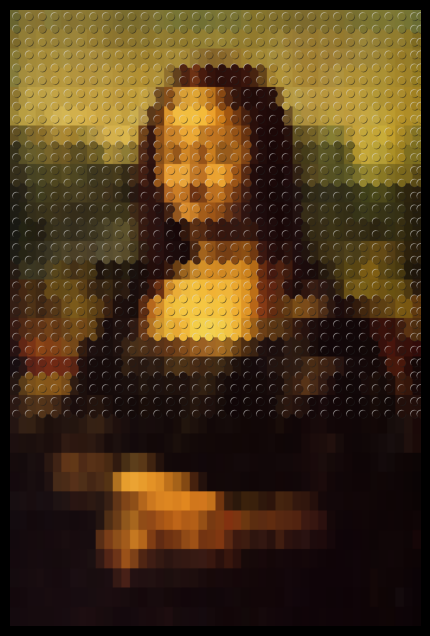

In [10]:
fig=plt.figure(figsize=(8,8))
plt.imshow(lego_img)
plt.gca().axis('off')
plt.gcf().set_facecolor("black")